In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'numpy'

In [ ]:
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

#data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [ ]:
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape) 
print("shape of Y_test:", Y_test.shape)

shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


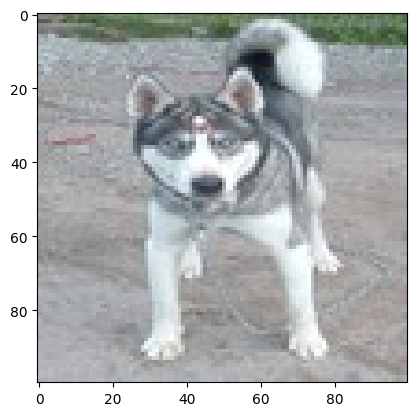

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\Imran\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape = (100,100,3))) # 32,64 is the filter
model.add(MaxPooling2D((2,2)))# converting 2d data to 1d data
model.add(Dropout(0.25)) # to remove particular data from the dataset

model.add(Conv2D(64, (3,3), activation= 'relu'))#(3,3) is the size of the filter( hidden layers)
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(datagen.flow(X_train, Y_train, batch_size=32),
        epochs=30,
        validation_data=(X_test, Y_test),
        verbose=1)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.4980 - loss: 0.7000 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5375 - loss: 0.6914 - val_accuracy: 0.5125 - val_loss: 0.6857
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5700 - loss: 0.6822 - val_accuracy: 0.6200 - val_loss: 0.6757
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5855 - loss: 0.6807 - val_accuracy: 0.6975 - val_loss: 0.6449
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6220 - loss: 0.6566 - val_accuracy: 0.7175 - val_loss: 0.6002
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.6305 - loss: 0.6505 - val_accuracy: 0.6825 - val_loss: 0.6222
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.6490 - loss: 0.6332 - val_accuracy: 0.7100 - val_loss: 0.5817
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6185 - loss: 0.6571 - val_accuracy: 0.6550 - v

In [ ]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7425 - loss: 0.5433


[0.5433489084243774, 0.7425000071525574]

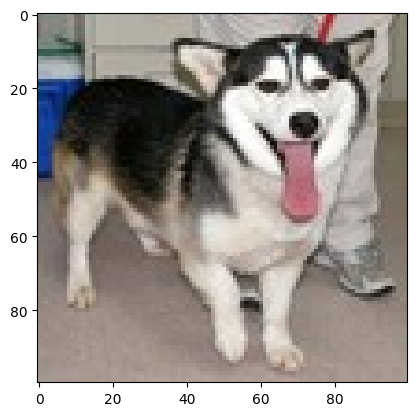

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The model prediction is: dog


In [ ]:
import random
import matplotlib.pyplot as plt

idx2 = random.randint(0, len(Y_test) - 1)   # FIXED

plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))
y_pred = (y_pred > 0.5).astype("int")  # convert to integer 0 or 1

if y_pred == 0:
    pred = "dog"
else:
    pred = "cat"

print("The model prediction is:", pred)


In [ ]:
model.save('model.h5')
print('our model is saved')

our model is saved
